# Predicting Customer Churn

## Introduction



One way to enhance the performance of a company is identifying unsatisfied and unhappy customers. Customer complains can happen despite the great service companies offer. Nowadays, media can play a major role to amplify the level of customers' unsatisfaction about the specific company. So, identifying these unhappy customer in advance give companies a chance to resolve the issue and offer incentives to unhappy customers to stay.  

The dataset I use is publicly available and was mentioned in the book “Discovering Knowledge in Data” by Daniel T. I downloaded the data from the link provided in 'https://aws.amazon.com/blogs/machine-learning/predicting-customer-churn-with-amazon-machine-learning/'. 

Here I work with imbalanced dataset and show two different approaches.

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


Using TensorFlow backend.


## Loading Data

In [2]:
churn = pd.read_csv('./data/churn.txt')

## Exploring Data Set

In [3]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
churn.tail()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False.


In [5]:
churn.shape

(3333, 21)

Lets see if there is any missing value in the dataset

In [6]:
churn.isnull().any().sum()

0

Descriptions for each columns:

* State: the US state in which the customer resides, indicated by a two-letter abbreviation; for example, OH or NJ
* Account Length: the number of days that this account has been active

* Area Code: the three-digit area code of the corresponding customer’s phone number
* Phone: the remaining seven-digit phone number

* Int’l Plan: whether the customer has an international calling plan: yes/no

* VMail Plan: whether the customer has a voice mail feature: yes/no

* VMail Message: presumably the average number of voice mail messages per month

* Day Mins: the total number of calling minutes used during the day

* Day Calls: the total number of calls placed during the day

* Day Charge: the billed cost of daytime calls

* Eve Mins, Eve Calls, Eve Charge: the billed cost for calls placed during the evening

* Night Mins, Night Calls, Night Charge: the billed cost for calls placed during nighttime

* Intl Mins, Intl Calls, Intl Charge: the billed cost for international calls

* CustServ Calls: the number of calls placed to Customer Service

* Churn?: whether the customer left the service: true/false

The last attribute, Churn?, is known as the target attribute–the attribute that we want the ML model to predict. Because the target attribute is binary, our model will be performing binary prediction, also known as binary classification.

## Create features and target


In [7]:
X = churn.drop("Churn?", axis =1)
y = churn["Churn?"]

##  Analyzing the Variables 


Look at the type of the variables:

In [8]:
X.dtypes.value_counts()
    

float64    8
int64      8
object     4
dtype: int64

In [9]:
obj_col=[]
for i in X.columns:
    if X[i].dtypes =='object':
        obj_col.append(i)
        
print('List of object type of columns:\n', obj_col)        

List of object type of columns:
 ['State', 'Phone', "Int'l Plan", 'VMail Plan']


In [10]:
num_col=[]
for i in X.columns:
    if ((X[i].dtypes =='int64') | (X[i].dtypes == 'float64')) :
        num_col.append(i)
        
print('List of numeric columns:\n', num_col)  

List of numeric columns:
 ['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls']


Looking at the unique value for each numeric columns

In [11]:
for i in X[num_col]:
    print(i,': number of unique value is {}'.format(X[num_col][i].nunique()))

Account Length : number of unique value is 212
Area Code : number of unique value is 3
VMail Message : number of unique value is 46
Day Mins : number of unique value is 1667
Day Calls : number of unique value is 119
Day Charge : number of unique value is 1667
Eve Mins : number of unique value is 1611
Eve Calls : number of unique value is 123
Eve Charge : number of unique value is 1440
Night Mins : number of unique value is 1591
Night Calls : number of unique value is 120
Night Charge : number of unique value is 933
Intl Mins : number of unique value is 162
Intl Calls : number of unique value is 21
Intl Charge : number of unique value is 162
CustServ Calls : number of unique value is 10


The unique value for 'Area Code' is 3. We can consider this variable as an objective one.

In [12]:
X['Area Code'] = X['Area Code'].astype('object')

In [13]:
X.dtypes.value_counts()

float64    8
int64      7
object     5
dtype: int64

one variable is added to the object. We have now 5 object type variables.

Lets look at the target variable

In [14]:
y.describe().T

count       3333
unique         2
top       False.
freq        2850
Name: Churn?, dtype: object

In [15]:
pd.crosstab(index=churn['Churn?'], columns ='observation' )

col_0,observation
Churn?,
False.,2850
True.,483


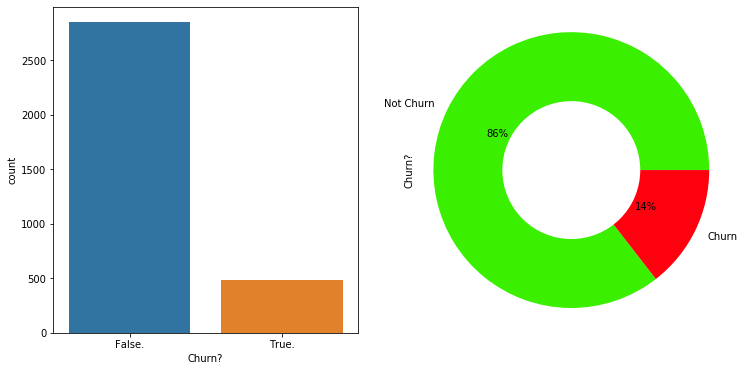

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot('Churn?', data = churn)

plt.subplot(122)
y.value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",6),labels=["Not Churn","Churn"])
centre_circle = plt.Circle((0,0), 0.5, fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

From the above observation, we can see that the target is imbalanced. About 14% of customers churn. 

Lets plot other variables.

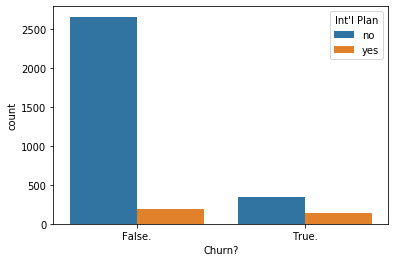

In [17]:
sns.countplot(x='Churn?', data=churn, hue="Int'l Plan")

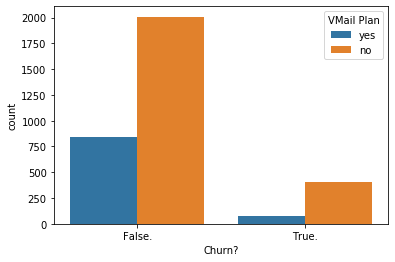

In [18]:
sns.countplot(x='Churn?', data=churn, hue="VMail Plan")

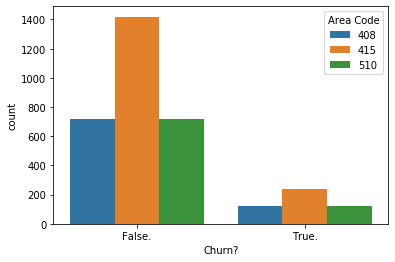

In [19]:
sns.countplot(x='Churn?', data=churn, hue="Area Code")

In [20]:
# Frequency tables for each categorical feature
for column in X.select_dtypes(include=['object']).columns:
     display(pd.crosstab(index=X[column], columns='% observations', normalize='columns'))

col_0,% observations
State,
AK,0.015602
AL,0.024002
AR,0.016502
AZ,0.019202
CA,0.010201
CO,0.019802
CT,0.022202
DC,0.016202
DE,0.018302


col_0,% observations
Area Code,
408,0.251425
415,0.496550
510,0.252025


col_0,% observations
Phone,
327-1058,0.0003
327-1319,0.0003
327-3053,0.0003
327-3587,0.0003
327-3850,0.0003
...,...
422-7728,0.0003
422-8268,0.0003
422-8333,0.0003


col_0,% observations
Int'l Plan,
no,0.90309
yes,0.09691


col_0,% observations
VMail Plan,
no,0.723372
yes,0.276628


## Multivariable Analysis

In [21]:
# Checking Categorical Data

X.select_dtypes(include=['object']).columns

Index(['State', 'Area Code', 'Phone', 'Int'l Plan', 'VMail Plan'], dtype='object')

In [22]:
# Checking Numerical Data

X.select_dtypes(include=['int64','float64']).columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

Account Length


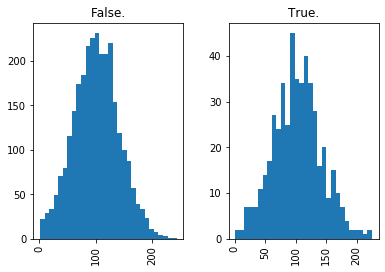

Area Code


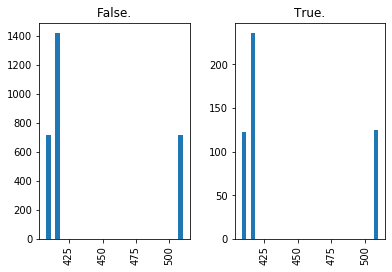

VMail Message


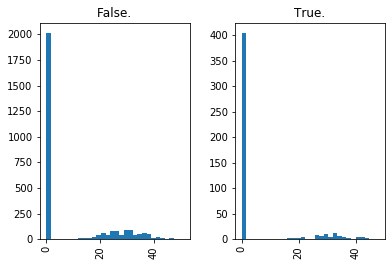

Day Mins


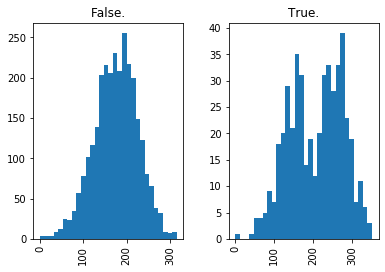

Day Calls


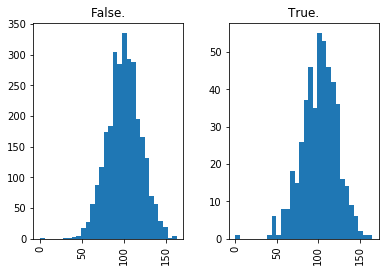

Day Charge


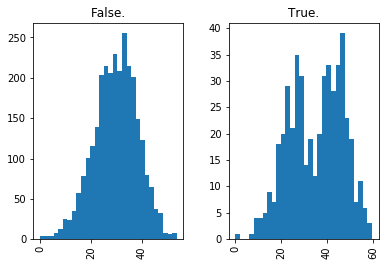

Eve Mins


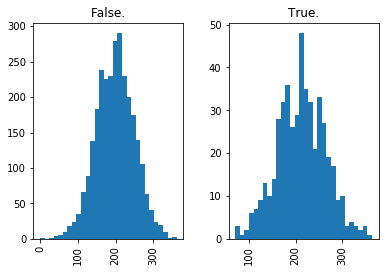

Eve Calls


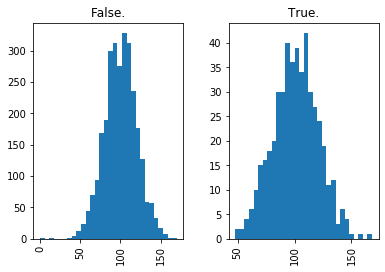

Eve Charge


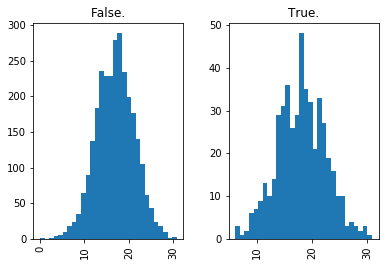

Night Mins


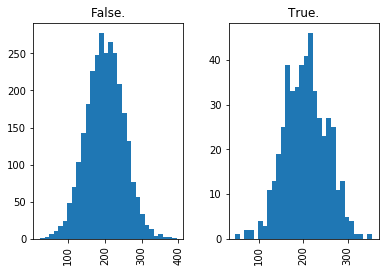

Night Calls


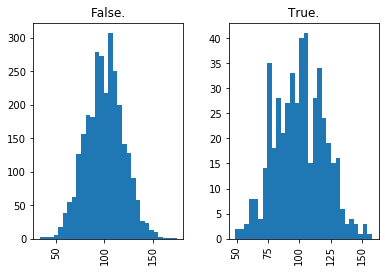

Night Charge


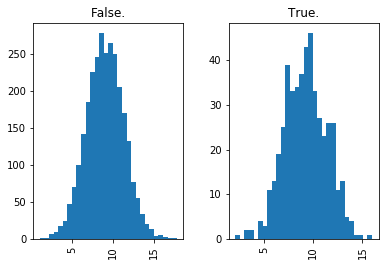

Intl Mins


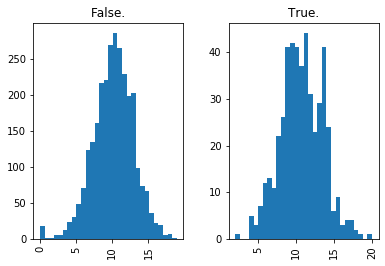

Intl Calls


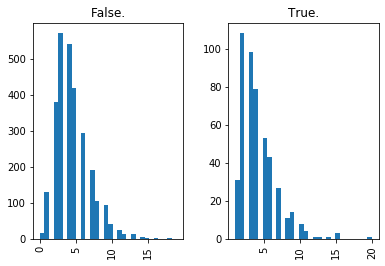

Intl Charge


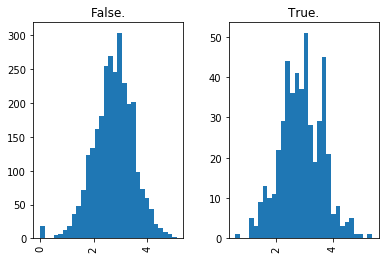

CustServ Calls


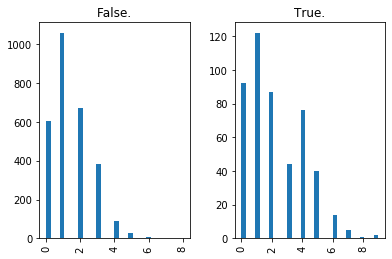

In [23]:
# for column in churn.select_dtypes(include=['object']).columns:
#     if column != 'Churn?':
#         display(pd.crosstab(index=churn[column], columns=churn['Churn?'], normalize='columns'))

for column in churn.select_dtypes(exclude=['object']).columns:
    print(column)
    hist = churn[[column, 'Churn?']].hist(by='Churn?', bins=30)
    plt.show()

We look at the correlation between all variables

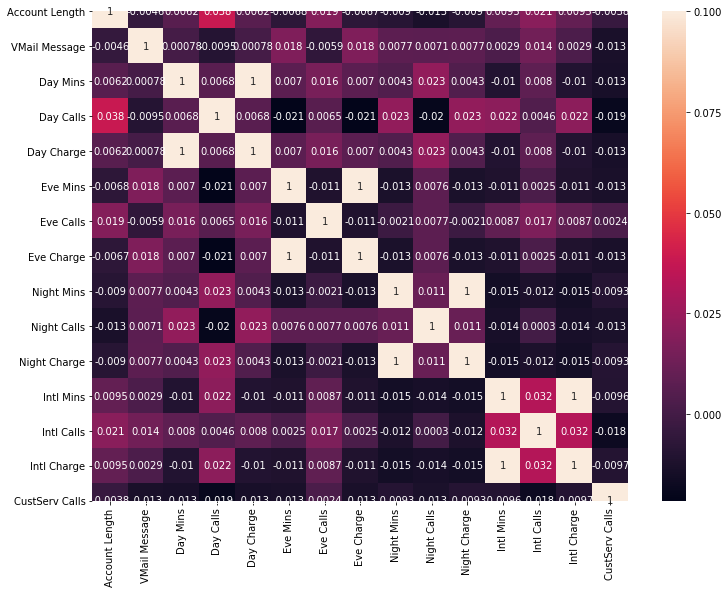

In [24]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(12, 9))
corrmat = X.corr()
sns.heatmap(corrmat, vmax=.1, annot=True);

It turns out that some variables are highly correlated. We will drop those variables later in this section.

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


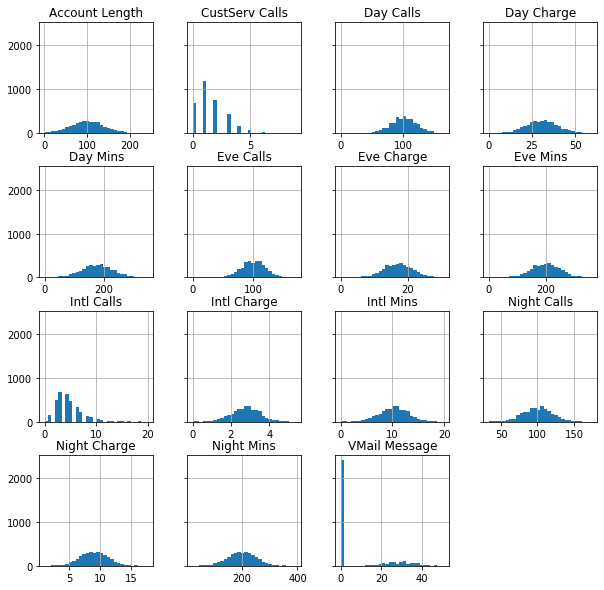

In [25]:
# Histograms for each numeric features
display(X.describe())
%matplotlib inline
hist = X.hist(bins=30, sharey=True, figsize=(10,10))

In [26]:
# Droping phone column
X = X.drop("Phone", axis = 1)


Droping highly correlated columns

In [27]:
X = X.drop(["Day Charge", "Eve Charge", "Night Charge", "Intl Charge"], axis =1)

In [28]:
X.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3


## Data Preparation

In [29]:
X =pd.get_dummies(X)

In [30]:
X.head()

,Account Length,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,...,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,...,0,0,0,0,1,0,1,0,0,1
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,...,0,0,0,0,1,0,1,0,0,1
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,...,0,0,0,0,1,0,1,0,1,0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,...,0,0,0,1,0,0,0,1,1,0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,...,0,0,0,0,1,0,0,1,1,0


In [31]:
y = pd.get_dummies(y)



In [32]:
y = y['True.']
y.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    0
Name: True., dtype: uint8

In [33]:
 #splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
X_train

,Account Length,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,...,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes
817,243,0,95.5,92,163.7,63,264.2,118,6.6,6,...,0,0,0,0,0,1,1,0,1,0
1373,108,0,112.0,105,193.7,110,208.9,93,4.1,4,...,0,0,0,0,1,0,1,0,1,0
679,75,0,222.4,78,327.0,111,208.0,104,8.7,9,...,0,0,0,0,1,0,0,1,1,0
56,141,0,126.9,98,180.0,62,140.8,128,8.0,2,...,0,0,0,0,1,0,1,0,1,0
1993,86,0,216.3,96,266.3,77,214.0,110,4.5,3,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,0,274.4,120,198.6,82,160.8,62,6.0,3,...,0,0,0,0,0,1,1,0,1,0
1130,122,0,35.1,62,180.8,89,251.6,58,12.7,2,...,0,0,0,0,1,0,1,0,1,0
1294,66,0,87.6,76,262.0,111,184.6,125,9.2,5,...,0,0,0,1,0,0,1,0,1,0
860,169,0,179.2,111,175.2,130,228.6,92,9.9,6,...,0,0,0,0,1,0,1,0,1,0


# Modeling

### Logistic Regression

First we start with applying simple logistic regression on the traing data and next evaluate the model on the test data.

In [35]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred = lr.predict(X_test)

In [37]:
accuracy = accuracy_score(y_pred, y_test)
print('Test accuracy is {:.2f}%'.format(accuracy))

Test accuracy is 0.84%


In [38]:
confusion_matrix(y_pred , y_test)

array([[552,  92],
       [ 14,   9]], dtype=int64)

<function matplotlib.pyplot.show(*args, **kw)>

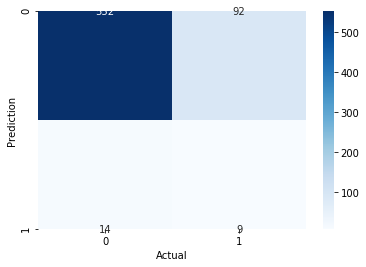

In [39]:
#Creat a heatmap
sns.heatmap(confusion_matrix(y_pred , y_test), annot=True, cmap='Blues', fmt='d')
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show

In [40]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91       644
           1       0.09      0.39      0.15        23

    accuracy                           0.84       667
   macro avg       0.53      0.62      0.53       667
weighted avg       0.94      0.84      0.89       667



We now do the same modeling but this time with only three variable. We expect that this time the accuracy drop down because the number of features are decreased. 

In [41]:
lr.fit(X_train[['Account Length', 'VMail Message', 'Day Mins']], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred_2 = lr.predict(X_test[['Account Length', 'VMail Message', 'Day Mins']])

In [43]:
accuracy = accuracy_score(y_pred_2, y_test)
print('Test accuracy is {:.2f}%'.format(accuracy))

Test accuracy is 0.85%


<function matplotlib.pyplot.show(*args, **kw)>

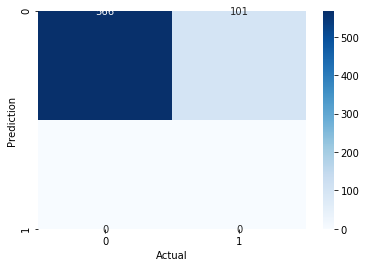

In [44]:
#Creat a heatmap
sns.heatmap(confusion_matrix(y_pred_2 , y_test), annot=True, cmap='Blues', fmt='d')
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show

In [45]:
print(classification_report(y_pred_2, y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       667
           1       0.00      0.00      0.00         0

    accuracy                           0.85       667
   macro avg       0.50      0.42      0.46       667
weighted avg       1.00      0.85      0.92       667



C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Well, we ca see that by decreasing the number of features the accuracy of the model does not change and it causes due to imbalanced dataset.

Usyally for imbalaced data accuracy is not the correct metric to measure. Metrics which can provide better insight are:
    * Confusion matrix
    * Recall
    * precision
    * F1

Here we use the resampling method to deal with imbalanced data. Resampling is a widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

In this work because the number of data is low we decided to use over-sampling method.

NOTE: Resampling have to do only for training dataset.

In [46]:
df_train = pd.concat((X_train, y_train), axis=1)

In [47]:
df_train.head()

,Account Length,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,...,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes,True.
817,243,0,95.5,92,163.7,63,264.2,118,6.6,6,...,0,0,0,0,1,1,0,1,0,0
1373,108,0,112.0,105,193.7,110,208.9,93,4.1,4,...,0,0,0,1,0,1,0,1,0,1
679,75,0,222.4,78,327.0,111,208.0,104,8.7,9,...,0,0,0,1,0,0,1,1,0,1
56,141,0,126.9,98,180.0,62,140.8,128,8.0,2,...,0,0,0,1,0,1,0,1,0,0
1993,86,0,216.3,96,266.3,77,214.0,110,4.5,3,...,0,0,0,0,1,1,0,1,0,0


### Over-sampling

In [48]:
#class count
count_class_0, count_class_1 = df_train['True.'].value_counts()

In [49]:
print(count_class_0)
print(count_class_1)

2284
382


In [50]:
#Divide by class
df_class_0 = df_train[df_train['True.'] == 0]
df_class_1 = df_train[df_train['True.'] == 1]

In [51]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_1_over,df_class_0], axis=0)

In [52]:
print('Random under_sampling:')
print(df_over['True.'].value_counts())

Random under_sampling:
1    2284
0    2284
Name: True., dtype: int64


Now, we continue with balanced dataset

In [53]:
y = df_over['True.']
x = df_over.drop(['True.'], axis =1 )

In [54]:
# fit the model on balanced data
lr.fit(x,y)

C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
oversampl_pred = lr.predict(X_test)

In [56]:
accuracy = accuracy_score(oversampl_pred, y_test)
print('Test accuracy is {:.2f}%'.format(accuracy))

Test accuracy is 0.70%


In [57]:
confusion_matrix(oversampl_pred , y_test)

array([[396,  29],
       [170,  72]], dtype=int64)

<function matplotlib.pyplot.show(*args, **kw)>

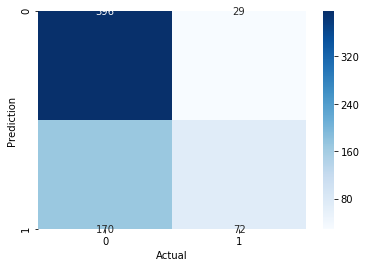

In [58]:
sns.heatmap(confusion_matrix(oversampl_pred , y_test), annot=True, cmap='Blues', fmt='d')
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show

In [59]:
print(classification_report(oversampl_pred, y_test))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       425
           1       0.71      0.30      0.42       242

    accuracy                           0.70       667
   macro avg       0.71      0.61      0.61       667
weighted avg       0.70      0.70      0.66       667



### Weights

Another possible way for imbalaced dataset is to tell logestic regression to put the weigth on errors proportional to the class imbalance. We perfome the modeling on the trainig dataset without applying over-sampling technique.

C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<function matplotlib.pyplot.show(*args, **kw)>

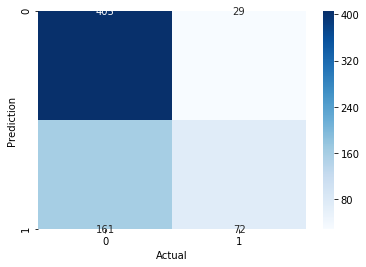

In [60]:
lr = LogisticRegression(class_weight='balanced')

# Fit
lr.fit(X_train, y_train)

# Predict
Wt_pred = lr.predict(X_test)

# Evaluate the model
# print(report(Wt_pred, y_test))
#Creat a heatmap
sns.heatmap(confusion_matrix(Wt_pred , y_test), annot=True, cmap='Blues', fmt='d')
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show

In [61]:
print(classification_report(Wt_pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       434
           1       0.71      0.31      0.43       233

    accuracy                           0.72       667
   macro avg       0.71      0.62      0.62       667
weighted avg       0.71      0.72      0.68       667



There is too many false negatives. So, we tune the class weights manually to find a better trade-off between false positives, false negatives and detected churn cases. The F1 score is a metric that attempts to take that tradeoff. We try to find the optimum by exploring the effect of weighting on F1 score.



In [62]:
weights = np.linspace(0.05, 0.95, 20)

gcv = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=3
)
gcv_result = gcv.fit(X_train, y_train)



C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

Best parameters : {'class_weight': {0: 0.19210526315789472, 1: 0.8078947368421052}}


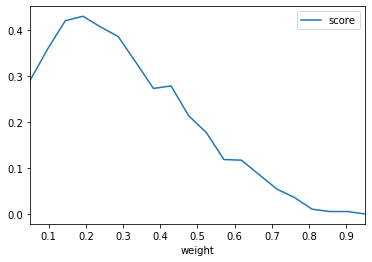

In [63]:
print("Best parameters : %s" % gcv_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': gcv_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

In [64]:
lr = LogisticRegression(**gcv_result.best_params_)

# Fit..
lr.fit(X_train, y_train)

# Predict..
gcv_pred = lr.predict(X_test)

C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.81      0.91      0.86       502
           1       0.55      0.34      0.42       165

    accuracy                           0.77       667
   macro avg       0.68      0.62      0.64       667
weighted avg       0.74      0.77      0.75       667



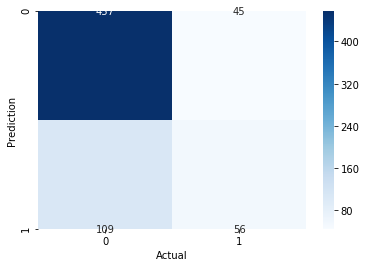

In [65]:
#Creat a heatmap
sns.heatmap(confusion_matrix(gcv_pred , y_test), annot=True, cmap='Blues', fmt='d')
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show

print(classification_report(gcv_pred, y_test))

### SMOTE

Another technique for synthesize the over-sampleing data is SMOTE. It is an acronym for Synthetic Minority Over-Sampling Technique.  

In [66]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [67]:
y_test.shape

(667,)

In [68]:
#Fit
lr.fit(X_resampled,y_resampled)

#Predict
smt_pred = lr.predict(X_test)

C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
confusion_matrix(smt_pred , y_test)

array([[181,   7],
       [385,  94]], dtype=int64)

              precision    recall  f1-score   support

           0       0.32      0.96      0.48       188
           1       0.93      0.20      0.32       479

    accuracy                           0.41       667
   macro avg       0.63      0.58      0.40       667
weighted avg       0.76      0.41      0.37       667



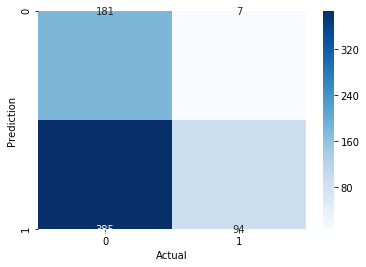

In [70]:
sns.heatmap(confusion_matrix(smt_pred , y_test), annot=True, cmap='Blues', fmt='d')
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show

print(classification_report(smt_pred, y_test))

We fit the model on the synthesized data with SMOTE technique. The result is not appealing. Again we like the above example We try to find the optimum by exploring the effect of weighting on F1 score

In [71]:
weights = np.linspace(0.05, 0.95, 20)

gcv = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=3
)
gcv_result = gcv.fit(X_resampled, y_resampled)

C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

Best parameters : {'class_weight': {0: 0.5236842105263158, 1: 0.47631578947368425}}


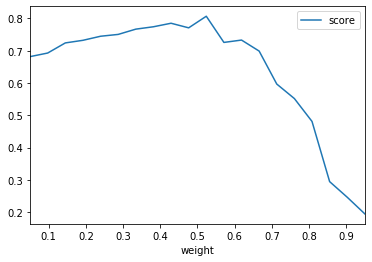

In [72]:
print("Best parameters : %s" % gcv_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': gcv_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

In [73]:
lr = LogisticRegression(**gcv_result.best_params_)

# Fit..
lr.fit(X_resampled, y_resampled)

# Predict..
gcv_smt_pred = lr.predict(X_test)

C:\Users\Nastaran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [74]:
confusion_matrix(gcv_smt_pred , y_test)

array([[444,  36],
       [122,  65]], dtype=int64)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       502
           1       0.55      0.34      0.42       165

    accuracy                           0.77       667
   macro avg       0.68      0.62      0.64       667
weighted avg       0.74      0.77      0.75       667



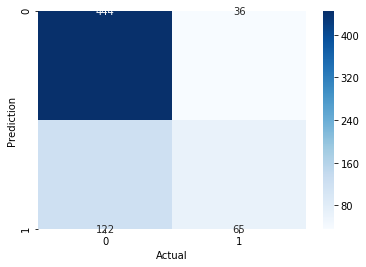

In [75]:
sns.heatmap(confusion_matrix(gcv_smt_pred , y_test), annot=True, cmap='Blues', fmt='d')
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show

print(classification_report(gcv_pred, y_test))

In [76]:
# pipe = make_pipeline(
#     SMOTE(),
#     LogisticRegression()
# )

# # Fit
# pipe.fit(X_train, y_train)

# # Predict
# pip_pred = pipe.predict(X_test)

In [77]:
# confusion_matrix(pip_pred , y_test)

In [78]:
# sns.heatmap(confusion_matrix(pip_pred , y_test), annot=True, cmap='Blues', fmt='d')
# plt.ylabel('Prediction')
# plt.xlabel('Actual')
# plt.show

# print(classification_report(pip_pred, y_test))